# Identify Persons of Interest using Machine Learning

### Eddy Shyu

### Summary of project goal

Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

Given information about Enron employees and whether they are persons of interest (POI) in fraud, we use machine learning to predict whether employees are persons of interest or not.  The data is primarily numerical, and either compensation related data (salary, bonus, stock options) or email count data (messages sent to persons of interest, all messages sent, etc). There are 144 persons in the dataset (after removing two non-person records), of which 18 are person of interest and the rest are not.  Some features have 100 or more missing values (deferral_payments, restricted_stock_deferred, director_fees, loan_advances), so we'll focus on features that have fewer missing values.  Compensation and email data can represent latent features, such as how similar a person is to a POI, or how professionally connected one is to a POI.  We will be using 11 features, 8 related to compensation, and 3 features related to email counts.

Each record should represent a person.  Using a histogram of salary, I found an outlier named "TOTAL", which I removed, since it is not a person.  I also removed "The Travel Agency in the Park" because it also does not represent a person.  Outliers that represent persons are kept (for example, Jeff Skilling's salary was an outlier that was kept).



---

### Feature Selection

What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]

I chose features that represent compensation and email counts, and excluded features that had more than a threshold of missing values.  When a feature has too many missing values, it can unintentionally associate missing values to a particular class.  When choosing the threshold, I wanted to include features that had fewer missing values than the core features that I wanted to keep (email counts), which was 60 missing values out of 144 total records.  The "bonus" feature was close enough to the threshold that I kept it as well.  So I selected 11 features, 8 that are compensation-related, and 3 that are email-related.

I normalized emails sent to persons of interest (POI) by dividing by total number of emails sent; similarly for emails received from POI and emails received that were also sent to a POI.  This represents the fraction of each person's emails that were associated with a POI.  The latent feature I think that this represents is how close the professional relationship was with POIs.  I scaled all of the compensation and email count ratios to range from 0 to 1, to accommodate algorithms that calculate distances using features, such as SVM.  

I used a random forest regression and also selectKBest algorithm to rank features by importance (highest importance first).

feature rank using random forest

[(0.16, 'expenses_scaled'), (0.16, 'exercised_stock_options_scaled'), (0.14, 'to_poi_ratio_scaled'), (0.1, 'shared_poi_ratio_scaled'), (0.1, 'other_scaled'), (0.09, 'salary_scaled'), (0.09, 'bonus_scaled'), (0.07, 'total_payments_scaled'), (0.04, 'total_stock_value_scaled'), (0.04, 'from_poi_ratio_scaled'), (0.02, 'restricted_stock_scaled')]

feature rank using SelectKBest

[(16.18, 'to_poi_ratio_scaled'), (9.02, 'shared_poi_ratio_scaled'), (3.05, 'from_poi_ratio_scaled'), (0.33, 'total_payments_scaled'), (0.21, 'exercised_stock_options_scaled'), (0.15, 'total_stock_value_scaled'), (0.11, 'restricted_stock_scaled'), (0.06, 'other_scaled'), (0.06, 'bonus_scaled'), (0.02, 'expenses_scaled'), (0.0, 'salary_scaled')]

For random forest feature ranking, I used the top 1 through 6 features (top 1, top 2, top 3 etc).  I used SVM to test. The best F1 score was from using the top three features: to poi ratio, bonus, and shared poi ratio.

For selectKbest ranking, I used the top 4,5,6 features, and SVM to test.  The best F1 score was from using the top 4 features: to poi ratio; shared poi ratio, from poi ratio, total payments.

Since I got the highest score using the top three features found by random forest ranking, I used either the top three features (to poi email ratio, bonus, shared email ratio), as well as all 11 features when comparing algorithms.  This is because decision trees and random forest performed better with all 11 features.


I also used SVM to test whether the new features improve prediction. 


#### SVM with top 3 features including email ratio:

Precision: 0.44888	Recall: 0.73100	F1: 0.55621

Features used are: to poi ratio, bonus, shared poi ratio

#### SVM without new features

Precision: 0.18282	Recall: 0.11600	F1: 0.14194

Features used are bonus, exercised stock options, from poi email count, salary

I used original features, ranked them using random forest, and used the top four from the ranking:

[(0.16, 'bonus_scaled'), (0.14, 'exercised_stock_options_scaled'), (0.11, 'from_poi_to_this_person'), (0.1, 'salary_scaled'), (0.08, 'shared_receipt_with_poi'), (0.08, 'other_scaled'), (0.08, 'from_messages'), (0.07, 'expenses_scaled'), (0.05, 'total_payments_scaled'), (0.05, 'from_this_person_to_poi'), (0.03, 'restricted_stock_scaled'), (0.02, 'to_messages'), (0.01, 'total_stock_value_scaled')]

I tuned parameters for SVM and tested.  The model performs worse without the new email ratio features.


---

### Algorithm selection

What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

I chose SVM, as it had the highest F1 score.  SVM had the highest recall, so it would be good for casting a wider net to find more potential POIs.  Adaboost with logistic regression had the highest precision, so it would be good for trying to label only the actual POIs as POIs.

I tried the following algorithms, using grid search to tune parameters and try with or without PCA.  The results are:

#### SVM
Precision: 0.44614	Recall: 0.82000	F1: 0.57787

SVM does better with the top 3 features rather than all 11

#### Adaboost and SVM
Precision: 0.43168	Recall: 0.65400	F1: 0.52008

Like SVM, Adaboost using SVM does best with the top selected features.
Adaboost with SVM does slightly worse than SVM alone.

#### Adaboost Decision Tree

Precision: 0.40729	Recall: 0.31850	F1: 0.35746

Similar to decision trees, adaboost using decision trees performs better using 11 features rather than the top 2

#### Naive Bayes

Precision: 0.39823	Recall: 0.24750	F1: 0.30527

Naive Bayes performs better with selected features rather than all of them

#### Adaboost with logistic regression

Precision: 0.48645	Recall: 0.18850	F1: 0.27171

Adaboost with logistic regression does a little bit better when using just the top 3 features as opposed to 11.
The three algorithms that had precision, recall and F1 above 0.30 are SVM, Adaboost with SVM, and Adaboost with decision trees.

#### Adaboost with Naive Bayes

Precision: 0.31329	Recall: 0.22400	F1: 0.26122

Adaboost with Naive Bayes did a little better with all 11 features rather than the top 3 features.

#### Random Forest

Precision: 0.38034	Recall: 0.14700	F1: 0.21204
Random forest with 11 features does worse than Adaboost with decision trees and 11 features, but better than decision trees alone.


#### Decision Trees

Precision: 0.21442	Recall: 0.16650	F1: 0.18745

Decision tree appears to do worse with just the top features, and when using PCA. Decision trees did better when I included all features.





---

### Parameter tuning

What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric item: “tune the algorithm”]

An algorithm's parameters are constants that can be altered to change the bias and variance of the model.  For instance, the SVM's C "penalty" can be increased to penalize mis-classifying each data point.  A higher penalty would make the model fit the training data more accurately, but also increase the variance of the model (a different training set would likely change the model significantly).  The SVM's gamma can be increased to reduce the influence of a data point in determining the classification of other points that are far away; this increases the model's bias, so that a different training set is not likely to result in a different model.

When using PCA, I varied the number of components used, and also tested on the original features without PCA.  For Adaboost, I varied the number of estimator iterations.  For SVM, I varied the C (penalty) and gamma.  For decision trees, I varied the minimum number of samples to allow a split.  For random forest, I varied the number of trees.  For logistic regression, I varied the penalty parameter.

#### Reference:
https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine

### Validation

What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric item: “validation strategy”]

Validation measures how well the model would perform when making new predictions.  Validation uses test data that is not part of the training data.  If the same data is used to train and validate a model, then the parameters that give the best validation score will also cause the model to overfit the data, resulting in a high variance model. A high variance model would change significantly each time it is given a different data set to train on.  Another requirement is for the training and test data to be chosen randomly, so that both sets are representative of the whole data set.  If training and test data are not representative of the whole set, then the model will perform poorly when validated against the test data. For example, if all training data are of POI and all test data are of non-POIs, then the model will make poor predictions when faced with the test data.

---

### Evaluation metrics

Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

The precision score measures what fraction of all predictions of POI are actually POI.

The recall score measures what fraction of all actual POIs are correctly predicted as POI.

An F1 score equally weighs the precision and recall as one score.  So a model has a higher F1 score when more of its predictions of POI are actually POI, and also when more of the actual POI are predicted as POI.

The cross validation method used is stratified shuffle split.  Stratified validation is useful when the number of POIs and non-POIs are very different as a fraction of the available data (for example, we have few POIs and many non-POIs).  When dividing the data into several folds (some of which are assigned to training, the rest for testing), each fold is stratified, meaning that the fraction of POIs in each fold is the same as the fraction in the whole data set.  The data is also shuffled before it is divided into folds.  Shuffling data also helps to make the training and test set more representative of the whole data set.

#### Reference
http://scikit-learn.org/stable/modules/cross_validation.html

---

# Appendix: steps taken to select features and choose algorithm

In [3]:
import sys
import pickle
from time import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
sys.path.append("../tools/")
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from tester import test_classifier

/Users/edude/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [205]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [201]:
len(data_dict)

146

In [206]:
feature_l = defaultdict(list)
for name, content in data_dict.iteritems():    
    feature_l['name'].append(name)
    for feature, value in content.iteritems():
        feature_l[feature].append(value)

In [203]:
feature_l.keys()

['to_messages',
 'deferral_payments',
 'expenses',
 'poi',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person',
 'deferred_income',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'from_messages',
 'other',
 'director_fees',
 'bonus',
 'total_stock_value',
 'from_this_person_to_poi',
 'restricted_stock',
 'salary',
 'name',
 'total_payments',
 'exercised_stock_options']

In [204]:
feature_l['name']

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

Looking at the names, 'The Travel Agency in the Park' is not a person, so we'll remove this.  We are trying to identify persons of interest, so we only want to train and test on person data.

In [207]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [376]:
#Convert dict to a data frame to describe data and plot it
data_df = pd.DataFrame(feature_l)

In [377]:
#remove NaN from each col and plot it for outliers
salary = data_df['salary']
salary_c = salary[salary.apply(lambda x: not math.isnan(float(x)))]
salary_c = pd.DataFrame(salary_c.apply(lambda x: float(x)))

In [378]:
salary_c.describe()

,salary
count,9.500000e+01
mean,5.621943e+05
std,2.716369e+06
min,4.770000e+02
25%,2.118160e+05
50%,2.599960e+05
75%,3.121170e+05
max,2.670423e+07


Histogram shows an outlier

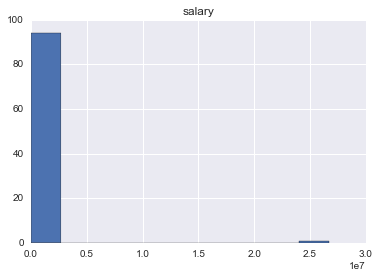

In [379]:
salary_c.hist();

In [384]:
salary_c.max()[0]

26704229.0

In [385]:
data_df[data_df['salary']==salary_c.max()[0]]['name']

104    TOTAL
Name: name, dtype: object

Remove the 'TOTAL' record from data_dict and the data frame

In [208]:
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [393]:
data_df = data_df[data_df['name'] != 'TOTAL']

In [435]:
data_df = data_df[data_df['name'] != 'THE TRAVEL AGENCY IN THE PARK']

In [443]:
poi = data_df['poi']
poi = poi.apply(lambda x: 1 if x else 0)

In [446]:
sum(poi)

18

In [394]:
#remove max from from salary_c and check again
salary_c = salary_c[ salary_c['salary'] != salary_c['salary'].max()]

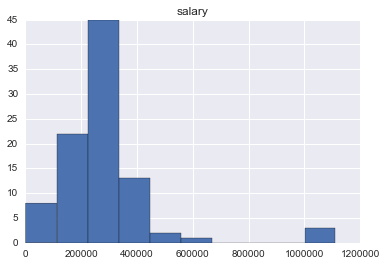

In [396]:
salary_c.hist();

In [397]:
salary_c['salary'].max()

1111258.0

In [398]:
data_df[ data_df['salary'] == salary_c['salary'].max() ]['name']

95    SKILLING JEFFREY K
Name: name, dtype: object

Since this second 'outlier' is a person, we'll keep this data.

Looking for other outliers

In [402]:
expenses = data_df['expenses']
expenses_c = expenses[expenses.apply(lambda x: not math.isnan(float(x)))]
expenses_c = pd.DataFrame(expenses_c.apply(lambda x: float(x)))

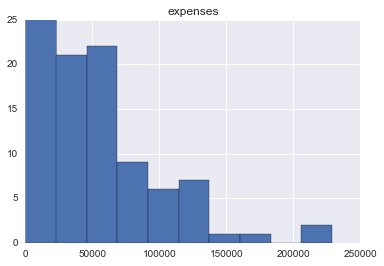

In [403]:
expenses_c.hist();

In [406]:
expenses_c.describe()

,expenses
count,94.000000
mean,54192.010638
std,46108.377454
min,148.000000
25%,22479.000000
50%,46547.500000
75%,78408.500000
max,228763.000000


In [407]:
data_df[ data_df['expenses'] == expenses_c['expenses'].max() ]['name']

71    MCCLELLAN GEORGE
Name: name, dtype: object

The max expense is from a person; we'll keep this as well.

In [409]:
nan_count = defaultdict(list)
for k, v in feature_l.iteritems():
    num_nan = sum([1 for e in v if e == 'NaN'] )
    nan_count['feature'].append(k)
    nan_count['nan_count'].append(num_nan)
    
nan_count = pd.DataFrame(nan_count)

In [410]:
nan_count.sort_values('nan_count')

,feature,nan_count
19,name,0
3,poi,0
15,total_stock_value,20
20,total_payments,21
5,email_address,35
17,restricted_stock,36
21,exercised_stock_options,44
2,expenses,51
18,salary,51
12,other,53


I prefer features that have more data as opposed to missing data.  Since I plan to use the email data, which have 60 NaNs per feature at most, I'll use that as the cut-off point.  Since 'bonus' is close to that cut-off at 64 NaNs, I'll also include 'bonus' and all features with fewer NaNs.  I'll exclude 'email address', since it is not numerical.

In [237]:
### Task 1: Select what features you'll use.
### feature_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

#The features are either related to compensation/expenses or to emails
feature_list = ['poi',
                 'salary',
                 'total_stock_value',
                 'total_payments',
                 'restricted_stock',
                 'exercised_stock_options',
                 'other',
                 'bonus',
                 'expenses',
                 'to_messages',
                 'from_messages',
                 'from_this_person_to_poi',
                 'from_poi_to_this_person',
                 'shared_receipt_with_poi'
                ]

Two members appear not to be persons, so I'll remove these from the data

### Create new features

I can scale the compensation data to be between 0 and 1.  This is helpful if using SVM or K-means which calculate a distance based on more than one dimension.

For emails, I can get a ratio of poi emails received divided by all emails received, and similarly for other poi_emails.

In [209]:
def scale_feature(data_dict, feature, feature_scaled):
    feature_l = [v[feature] for v in data_dict.values() if v[feature] != 'NaN']
    scaler = MinMaxScaler()
    scaler.fit(np.array(feature_l).reshape(len(feature_l),1))
    
    for name, data in data_dict.iteritems():
        if data[feature] == 'NaN':
            data[feature_scaled] = 'NaN'
        else:
            data[feature_scaled] = scaler.transform(np.array([[data[feature]]]))[0][0]
    return data_dict

In [210]:
def compute_ratio(data_dict, numerator, denominator, ratio):
    for k, v in data_dict.iteritems():
        n = v[numerator]
        d = v[denominator]
        if n == 'NaN' or d == 'NaN' or d == 0:
            data_dict[k][ratio] = 'NaN'
        else:
            data_dict[k][ratio] = float(n) / float(d)

In [211]:
#first compute email ratios
ratios_to_compute = [('from_this_person_to_poi', 'from_messages', 'to_poi_ratio'),
                     ('from_poi_to_this_person', 'to_messages', 'from_poi_ratio'),
                     ('shared_receipt_with_poi', 'to_messages', 'shared_poi_ratio')
                    ]

for numerator, denominator, ratio in ratios_to_compute:
    compute_ratio(data_dict, numerator, denominator, ratio)

In [212]:
#then scale compensation, expense, and email ratios
feature_to_scale = ['salary',
                    'total_stock_value',
                     'total_payments',
                     'restricted_stock',
                     'exercised_stock_options',
                     'other',
                     'bonus',
                     'expenses',
                     'to_poi_ratio',
                     'from_poi_ratio',
                     'shared_poi_ratio'
                    ]
for feature in feature_to_scale:
    data_dict = scale_feature(data_dict, feature, feature + '_scaled')

In [21]:
data_dict[data_dict.keys()[0]]

{'bonus': 600000,
 'bonus_scaled': 0.0054485481824213819,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'exercised_stock_options_scaled': 'NaN',
 'expenses': 94299,
 'expenses_scaled': 0.017984737490568382,
 'from_messages': 29,
 'from_poi_ratio': 0.04708798017348203,
 'from_poi_ratio_scaled': 0.21665480239394658,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'other_scaled': 4.0733496365754174e-05,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'restricted_stock_scaled': 0.023994802131269415,
 'salary': 365788,
 'salary_scaled': 0.013680137532733229,
 'shared_poi_ratio': 0.8698884758364313,
 'shared_poi_ratio_scaled': 0.86644162302202699,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'to_poi_ratio': 0.034482758620689655,
 'to_poi_ratio_scaled'

In [213]:
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]

In [221]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [222]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

#### Rank features by random forest


In [29]:
feature_only = feature_list[1:]

In [327]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(features, labels)
feature_rank = sorted (zip (map(lambda x: round(x,2),clf.feature_importances_) , feature_only), reverse=True)
print "feature rank using random forest"
print feature_rank

feature rank using random forest
[(0.18, 'to_poi_ratio_scaled'), (0.14, 'bonus_scaled'), (0.12, 'shared_poi_ratio_scaled'), (0.11, 'total_stock_value_scaled'), (0.1, 'exercised_stock_options_scaled'), (0.09, 'total_payments_scaled'), (0.09, 'other_scaled'), (0.09, 'expenses_scaled'), (0.05, 'restricted_stock_scaled'), (0.02, 'from_poi_ratio_scaled'), (0.01, 'salary_scaled')]


In [328]:
#test with top 1 feature of random forest ranking
feature_list = ['poi',
                'to_poi_ratio_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.61657	Precision: 0.26894	Recall: 0.98000	F1: 0.42205	F2: 0.64103
	Total predictions: 7000	True positives:  980	False positives: 2664	False negatives:   20	True negatives: 3336



In [329]:
#test with top 2 features of random forest ranking
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.72020	Precision: 0.40527	Recall: 0.85350	F1: 0.54958	F2: 0.69890
	Total predictions: 10000	True positives: 1707	False positives: 2505	False negatives:  293	True negatives: 5495



In [330]:
#test with top 3 features of random forest ranking
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.78218	Precision: 0.44614	Recall: 0.82000	F1: 0.57787	F2: 0.70230
	Total predictions: 11000	True positives: 1640	False positives: 2036	False negatives:  360	True negatives: 6964



In [344]:
#test with top 4 features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled',
                'total_stock_value_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.76469	Precision: 0.35959	Recall: 0.67800	F1: 0.46994	F2: 0.57599
	Total predictions: 13000	True positives: 1356	False positives: 2415	False negatives:  644	True negatives: 8585



In [343]:
#test with top 5 features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled',
                'total_stock_value_scaled',
                'exercised_stock_options_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.76131	Precision: 0.35634	Recall: 0.68400	F1: 0.46857	F2: 0.57775
	Total predictions: 13000	True positives: 1368	False positives: 2471	False negatives:  632	True negatives: 8529



In [345]:
#test with top 6 features
feature_list = ['poi',
                'shared_poi_ratio_scaled',
                'bonus_scaled',
                'expenses_scaled',
                'exercised_stock_options_scaled',
                'total_stock_value_scaled',
                'total_payments_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.75893	Precision: 0.31583	Recall: 0.58950	F1: 0.41130	F2: 0.50243
	Total predictions: 14000	True positives: 1179	False positives: 2554	False negatives:  821	True negatives: 9446



#### Rank feature using selectKBest

In [193]:
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]

from sklearn.feature_selection import SelectKBest
clf = SelectKBest(k=11)
clf.fit(features, labels)
feature_rank = sorted (zip (map(lambda x: round(x,2),clf.scores_), feature_only), reverse = True)
print "feature rank using SelectKBest"
print feature_rank

feature rank using SelectKBest
[(16.18, 'to_poi_ratio_scaled'), (9.02, 'shared_poi_ratio_scaled'), (3.05, 'from_poi_ratio_scaled'), (0.33, 'total_payments_scaled'), (0.21, 'exercised_stock_options_scaled'), (0.15, 'total_stock_value_scaled'), (0.11, 'restricted_stock_scaled'), (0.06, 'other_scaled'), (0.06, 'bonus_scaled'), (0.02, 'expenses_scaled'), (0.0, 'salary_scaled')]


Test with top 4 features

In [346]:
#test with top 3 features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'shared_poi_ratio_scaled',
                'from_poi_ratio_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.67544	Precision: 0.24744	Recall: 0.94100	F1: 0.39184	F2: 0.60297
	Total predictions: 9000	True positives:  941	False positives: 2862	False negatives:   59	True negatives: 5138



In [347]:
#test with top 4 features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'shared_poi_ratio_scaled',
                'from_poi_ratio_scaled',
                'total_payments_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.75836	Precision: 0.33794	Recall: 0.72100	F1: 0.46019	F2: 0.58776
	Total predictions: 14000	True positives: 1442	False positives: 2825	False negatives:  558	True negatives: 9175



In [348]:
#test with top 5 features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'shared_poi_ratio_scaled',
                'from_poi_ratio_scaled',
                'total_payments_scaled',
                'exercised_stock_options_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.75386	Precision: 0.32245	Recall: 0.65650	F1: 0.43248	F2: 0.54382
	Total predictions: 14000	True positives: 1313	False positives: 2759	False negatives:  687	True negatives: 9241



In [349]:
#test with top 6 features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'shared_poi_ratio_scaled',
                'from_poi_ratio_scaled',
                'total_payments_scaled',
                'exercised_stock_options_scaled',
                'total_stock_value_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.73950	Precision: 0.29920	Recall: 0.61350	F1: 0.40223	F2: 0.50698
	Total predictions: 14000	True positives: 1227	False positives: 2874	False negatives:  773	True negatives: 9126



Given the results, I'll use the top 3 feaures as ranked by random forest:

to poi ratio

bonus

shared poi ratio


In [244]:
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]

### Try classifiers

In [103]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [105]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

#### Naive Bayes

Precision: 0.39823	Recall: 0.24750	F1: 0.30527

Naive Bayes performs better with selected features rather than all of them

In [350]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import StratifiedShuffleSplit

feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
clf = GaussianNB()
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

GaussianNB(priors=None)
	Accuracy: 0.79518	Precision: 0.39823	Recall: 0.24750	F1: 0.30527	F2: 0.26777
	Total predictions: 11000	True positives:  495	False positives:  748	False negatives: 1505	True negatives: 8252



In [265]:
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
clf = GaussianNB()
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

GaussianNB(priors=None)
	Accuracy: 0.83867	Precision: 0.33465	Recall: 0.21250	F1: 0.25994	F2: 0.22923
	Total predictions: 15000	True positives:  425	False positives:  845	False negatives: 1575	True negatives: 12155



#### Support Vector Machine

Precision: 0.44614	Recall: 0.82000	F1: 0.57787

SVM does better with the top 3 features rather than all 11

In [340]:
from sklearn.svm import SVC

feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]

data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

svc = SVC(kernel='rbf', class_weight='balanced')
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
param_grid = {'C': [5e2, 1e3, 5e3, 1e4, 1e4],
              'gamma': [.05, 0.1, 0.5, 1]
             }
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv, scoring='f1')
grid.fit(features,labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  0.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [500.0, 1000.0, 5000.0, 10000.0, 10000.0], 'gamma': [0.05, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [341]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'C': 1000.0, 'gamma': 0.1} with a score of 0.570071428571


In [338]:
#test with top 3 features of random forest ranking
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
C = 1000
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.78218	Precision: 0.44614	Recall: 0.82000	F1: 0.57787	F2: 0.70230
	Total predictions: 11000	True positives: 1640	False positives: 2036	False negatives:  360	True negatives: 6964



In [266]:
#test with 11 features
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
C = 10000 
gamma = 0.5 
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=10000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.80960	Precision: 0.26940	Recall: 0.25000	F1: 0.25934	F2: 0.25365
	Total predictions: 15000	True positives:  500	False positives: 1356	False negatives: 1500	True negatives: 11644



#### Decision Trees

Precision: 0.21442	Recall: 0.16650	F1: 0.18745

Decision tree appears to do worse with just the top features, and when using PCA. Decision trees did better when I included all features.

In [351]:
from sklearn.tree import DecisionTreeClassifier

feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

dtc = DecisionTreeClassifier()
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
param_grid = {'min_samples_split' : [20, 40, 60, 80]
             }
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  0.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [20, 40, 60, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [352]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'min_samples_split': 20} with a score of 0.247428571429


In [353]:
feature_list = ['poi',
                'shared_poi_ratio_scaled',
                'bonus_scaled'
                ]
clf = DecisionTreeClassifier(min_samples_split=20)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.77945	Precision: 0.20251	Recall: 0.07250	F1: 0.10677	F2: 0.08318
	Total predictions: 11000	True positives:  145	False positives:  571	False negatives: 1855	True negatives: 8429



In [324]:
#tune parameters with 11 features
from sklearn.tree import DecisionTreeClassifier

feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

dtc = DecisionTreeClassifier()
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
param_grid = {'min_samples_split' : [20, 40, 60, 80]
             }
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  1.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [20, 40, 60, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [325]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'min_samples_split': 20} with a score of 0.135904761905


In [326]:
#try again with 11 features
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
clf = DecisionTreeClassifier(min_samples_split=20)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80753	Precision: 0.21442	Recall: 0.16650	F1: 0.18745	F2: 0.17429
	Total predictions: 15000	True positives:  333	False positives: 1220	False negatives: 1667	True negatives: 11780



#### Adaboost with Naive Bayes

Precision: 0.31329	Recall: 0.22400	F1: 0.26122

Adaboost with Naive Bayes did a little better with all 11 features rather than the top 3 features.

In [354]:
from sklearn.ensemble import AdaBoostClassifier

feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

gnb = GaussianNB()
ada = AdaBoostClassifier(base_estimator=gnb, algorithm='SAMME')
n_iter=100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
param_grid={'n_estimators': [5,10]
           }
grid = GridSearchCV(estimator=ada, param_grid=param_grid, cv=cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  0.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME', base_estimator=GaussianNB(priors=None),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

In [355]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'n_estimators': 5} with a score of 0.212547619048


In [356]:
#test with select features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]

gnb = GaussianNB()
clf = AdaBoostClassifier(base_estimator=gnb, algorithm='SAMME', n_estimators=5)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

AdaBoostClassifier(algorithm='SAMME', base_estimator=GaussianNB(priors=None),
          learning_rate=1.0, n_estimators=5, random_state=None)
	Accuracy: 0.80045	Precision: 0.39617	Recall: 0.18600	F1: 0.25315	F2: 0.20808
	Total predictions: 11000	True positives:  372	False positives:  567	False negatives: 1628	True negatives: 8433



In [270]:
#test with 11 features
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
gnb = GaussianNB()
clf = AdaBoostClassifier(base_estimator=gnb, algorithm='SAMME', n_estimators=5)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

AdaBoostClassifier(algorithm='SAMME', base_estimator=GaussianNB(priors=None),
          learning_rate=1.0, n_estimators=5, random_state=None)
	Accuracy: 0.83107	Precision: 0.31329	Recall: 0.22400	F1: 0.26122	F2: 0.23754
	Total predictions: 15000	True positives:  448	False positives:  982	False negatives: 1552	True negatives: 12018



#### Adaboost and SVM

Precision: 0.43168	Recall: 0.65400	F1: 0.52008

Like SVM, Adaboost using SVM does best with the top selected features.
Adaboost with SVM does slightly worse than SVM alone.

Note that if adaboost algorithm is set to the default SAMME.R, then it requires the weak learner (base estimator) to support calculation of class probabilities (it needs the base estimator to have the attribute 'predict_proba'.  

Since SVM does not have this, I need to set algorithm to SAMME.

In [357]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)

svc = SVC(kernel='rbf', class_weight='balanced')
ada = AdaBoostClassifier(base_estimator=svc, algorithm = 'SAMME')

param_grid = {
    'base_estimator__C': [1e3, 5e3, 1e4, 5e4],
    'base_estimator__gamma': [0.25, 0.5, 0.75],
    'n_estimators' : [5, 10]
          }
grid = GridSearchCV(estimator=ada, param_grid=param_grid, cv = cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  0.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'base_estimator__C': [1000.0, 5000.0, 10000.0, 50000.0], 'n_estimators': [5, 10], 'base_estimator__gamma': [0.25, 0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [358]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'base_estimator__C': 10000.0, 'n_estimators': 5, 'base_estimator__gamma': 0.25} with a score of 0.516777777778


In [359]:
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
C = 10000
gamma = 0.25
n_estimators = 5
svc = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
clf = AdaBoostClassifier(base_estimator=svc, algorithm = 'SAMME', n_estimators=n_estimators)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=10000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=5, random_state=None)
	Accuracy: 0.78055	Precision: 0.43168	Recall: 0.65400	F1: 0.52008	F2: 0.59293
	Total predictions: 11000	True positives: 1308	False positives: 1722	False negatives:  692	True negatives: 7278



#### Adaboost Decision Tree

Precision: 0.40729	Recall: 0.31850	F1: 0.35746

Similar to decision trees, adaboost using decision trees performs better using 11 features rather than the top 2

In [360]:
from sklearn.tree import DecisionTreeClassifier

feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=base_estimator, algorithm = 'SAMME')
param_grid = {'base_estimator__min_samples_split' : [50,60,70],
              'n_estimators' : [2,3,5]
             }
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
grid = GridSearchCV(estimator=ada, param_grid=param_grid, cv = cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  0.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [2, 3, 5], 'base_estimator__min_samples_split': [50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [361]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'n_estimators': 3, 'base_estimator__min_samples_split': 70} with a score of 0.476


In [364]:
#test with best features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
min_samples_split = 70
n_estimators = 3
dtc = DecisionTreeClassifier(min_samples_split=min_samples_split)
clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=n_estimators)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=70, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=3, random_state=None)
	Accuracy: 0.79736	Precision: 0.34075	Recall: 0.12250	F1: 0.18021	F2: 0.14050
	Total predictions: 11000	True positives:  245	False positives:  474	False negatives: 1755	True negatives: 8526



In [294]:
#grid search using 11 features
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=base_estimator, algorithm = 'SAMME')
param_grid = {'base_estimator__min_samples_split' : [40,50,60,70],
              'n_estimators' : [3,5,7]
             }
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
grid = GridSearchCV(estimator=ada, param_grid=param_grid, cv = cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  1.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 7], 'base_estimator__min_samples_split': [40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [295]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'n_estimators': 5, 'base_estimator__min_samples_split': 50} with a score of 0.393666666667


In [293]:
#test with 11 features
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
min_samples_split = 50
n_estimators=5
dtc = DecisionTreeClassifier(min_samples_split=min_samples_split)
clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=n_estimators)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=None)
	Accuracy: 0.84733	Precision: 0.40729	Recall: 0.31850	F1: 0.35746	F2: 0.33302
	Total predictions: 15000	True positives:  637	False positives:  927	False negatives: 1363	True negatives: 12073



#### Random Forest

Precision: 0.38034	Recall: 0.14700	F1: 0.21204
Random forest with 11 features does worse than Adaboost with decision trees and 11 features

In [300]:
from sklearn.ensemble import RandomForestClassifier

#grid search using 11 features
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

rfc = RandomForestClassifier()
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
param_grid = {'min_samples_split' : [40, 50, 60],
              'n_estimators' : [2,3,4]
             }
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  1.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [40, 50, 60], 'n_estimators': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [301]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'min_samples_split': 50, 'n_estimators': 2} with a score of 0.198333333333


In [302]:
#run test on best parameters
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
min_samples_split = 50
n_estimators = 2
clf = RandomForestClassifier(min_samples_split=min_samples_split,
                            n_estimators=n_estimators)
test_classifier(clf=clf,dataset=my_dataset, feature_list=feature_list, folds=1000)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.85433	Precision: 0.38034	Recall: 0.14700	F1: 0.21204	F2: 0.16756
	Total predictions: 15000	True positives:  294	False positives:  479	False negatives: 1706	True negatives: 12521



#### Adaboost with logistic regression

Precision: 0.48645	Recall: 0.18850	F1: 0.27171

Adaboost with logistic regression does a little bit better when using just the top 3 features as opposed to 11.

This posting pointed out that the Adaboost's base estimator should support class probabilities, and gave logistic regression as an example.

#### Reference 
http://stackoverflow.com/questions/27107205/sklearn-ensemble-adaboostclassifier-cannot-accecpt-svm-as-base-estimator

In [365]:
from sklearn.linear_model import LogisticRegression
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

algorithm = 'SAMME'
reg = LogisticRegression()
ada = AdaBoostClassifier(base_estimator=reg, 
                         algorithm = 'SAMME')
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
param_grid = {
    'base_estimator__C' : [2.25e4, 5e4, 7.5e4],
    'n_estimators' : [2,3,4]
}
grid = GridSearchCV(estimator=ada, param_grid=param_grid, cv=cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  0.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'base_estimator__C': [22500.0, 50000.0, 75000.0], 'n_estimators': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [366]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'base_estimator__C': 22500.0, 'n_estimators': 4} with a score of 0.207666666667


In [367]:
#test with top features
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
base_estimator = LogisticRegression(C=22500)
clf = AdaBoostClassifier(base_estimator=base_estimator,
                         n_estimators=4,
                         algorithm = 'SAMME')
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=22500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=4, random_state=None)
	Accuracy: 0.81627	Precision: 0.48645	Recall: 0.18850	F1: 0.27171	F2: 0.21481
	Total predictions: 11000	True positives:  377	False positives:  398	False negatives: 1623	True negatives: 8602



In [313]:
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

algorithm = 'SAMME'
reg = LogisticRegression()
ada = AdaBoostClassifier(base_estimator=reg, 
                         algorithm = 'SAMME')
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
param_grid = {
    'base_estimator__C' : [2.25e4, 5e4, 7.5e4],
    'n_estimators' : [2,3,4]
}
grid = GridSearchCV(estimator=ada, param_grid=param_grid, cv=cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  1.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'base_estimator__C': [22500.0, 50000.0, 75000.0], 'n_estimators': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [314]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'base_estimator__C': 75000.0, 'n_estimators': 4} with a score of 0.251857142857


In [316]:
#test
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
base_estimator = LogisticRegression(C=75000)
clf = AdaBoostClassifier(base_estimator=base_estimator,
                         n_estimators=4,
                         algorithm = 'SAMME')
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=75000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=4, random_state=None)
	Accuracy: 0.83167	Precision: 0.28216	Recall: 0.17000	F1: 0.21217	F2: 0.18468
	Total predictions: 15000	True positives:  340	False positives:  865	False negatives: 1660	True negatives: 12135



### Effects of created features

Compare SVM with the email ratio features, with just the email counts, and without the email data

#### SVM with email ratio features
Precision: 0.44888	Recall: 0.73100	F1: 0.55621

In [368]:
feature_list = ['poi',
                'to_poi_ratio_scaled',
                'bonus_scaled',
                'shared_poi_ratio_scaled'
                ]
C = 1000 
gamma = 0.1
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.78218	Precision: 0.44614	Recall: 0.82000	F1: 0.57787	F2: 0.70230
	Total predictions: 11000	True positives: 1640	False positives: 2036	False negatives:  360	True negatives: 6964



#### SVM without new features

Precision: 0.18282	Recall: 0.11600	F1: 0.14194

I used original features, ran feature ranking using random forest, and used the top four from the ranking:

[(0.16, 'bonus_scaled'), (0.14, 'exercised_stock_options_scaled'), (0.11, 'from_poi_to_this_person'), (0.1, 'salary_scaled'), (0.08, 'shared_receipt_with_poi'), (0.08, 'other_scaled'), (0.08, 'from_messages'), (0.07, 'expenses_scaled'), (0.05, 'total_payments_scaled'), (0.05, 'from_this_person_to_poi'), (0.03, 'restricted_stock_scaled'), (0.02, 'to_messages'), (0.01, 'total_stock_value_scaled')]

I tuned parameters for SVM and tested.  The model performs worse without the new email ratio features.

In [370]:
#first use random forest to rank all original features

feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_messages',
                 'from_messages',
                 'from_this_person_to_poi',
                 'from_poi_to_this_person',
                 'shared_receipt_with_poi'
                ]

feature_only = feature_list[1:]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(features, labels)
feature_rank = sorted (zip (map(lambda x: round(x,2),clf.feature_importances_) , feature_only), reverse=True)
print "feature rank using random forest"
print feature_rank

feature rank using random forest
[(0.16, 'bonus_scaled'), (0.14, 'exercised_stock_options_scaled'), (0.11, 'from_poi_to_this_person'), (0.1, 'salary_scaled'), (0.08, 'shared_receipt_with_poi'), (0.08, 'other_scaled'), (0.08, 'from_messages'), (0.07, 'expenses_scaled'), (0.05, 'total_payments_scaled'), (0.05, 'from_this_person_to_poi'), (0.03, 'restricted_stock_scaled'), (0.02, 'to_messages'), (0.01, 'total_stock_value_scaled')]


In [372]:
from sklearn.svm import SVC
feature_list = ['poi',
                'bonus_scaled',
                'exercised_stock_options_scaled',
                'from_poi_to_this_person',
                'salary_scaled'
                ]
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
svc = SVC(kernel='rbf', class_weight='balanced')
n_iter = 100
cv = StratifiedShuffleSplit(y=labels, n_iter=n_iter, random_state=42)
param_grid = {'C': [5e2, 1e3, 5e3, 1e4],
              'gamma': [0.5, 1, 1.5, 2]
             }
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv, scoring='f1')
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  1.  0.], n_iter=100, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [500.0, 1000.0, 5000.0, 10000.0], 'gamma': [0.5, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [373]:
print "The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_)

The best parameters are {'C': 500.0, 'gamma': 0.5} with a score of 0.127523809524


In [374]:
# test with parameters tuned for the two best non-email features
feature_list = ['poi',
                'bonus_scaled',
                'exercised_stock_options_scaled',
                'from_poi_to_this_person',
                'salary_scaled'
                ]
C = 500
gamma = 0.5
clf = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

SVC(C=500, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.78423	Precision: 0.18282	Recall: 0.11600	F1: 0.14194	F2: 0.12515
	Total predictions: 13000	True positives:  232	False positives: 1037	False negatives: 1768	True negatives: 9963

